In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import seaborn as sns  # a visualizatihttp://localhost:8889/notebooks/Desktop/CS210%20Group%20Project%20(Google%20Play).ipynb#on library based on matplotlib
from sklearn import datasets

import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

%matplotlib inline

from os.path import join

d_path = ""
filename = "googleplaystore.csv"
filename2= "AppleStore.csv"
df = pd.read_csv(join(d_path, filename))
df_o = pd.read_csv(join(d_path, filename))
df2 = pd.read_csv(join(d_path, filename2),error_bad_lines=False)
df_o2 = pd.read_csv(join(d_path, filename2),error_bad_lines=False)
df['Size'] = df['Size'].map(lambda x: x.rstrip('M'))
df=df.drop([10472])
df['Installs'] = df['Installs'].map(lambda x: x.rstrip('+'))
df["Installs"] = df["Installs"].str.replace(",","").astype(int)
df= df[df['Size']!='Varies with device']
df=df.reset_index()
for i in range(len(df["Size"])):
    if df["Size"][i][-1]=="k":
        df["Size"][i]=df["Size"][i][0:-1]
        df["Size"][i]=float(df["Size"][i])
        df["Size"][i]=df["Size"][i]/1024
df["Size"] = df["Size"].astype(float)        
df2["size_bytes"]=df2["size_bytes"]/(1024*1024)
df2["size_bytes"] = df2["size_bytes"].astype(float)  
df2=df2.reset_index()
df=df.dropna()
df2=df2.dropna()

# Google Play Store

In [3]:
df

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.000000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.000000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.700000,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.000000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.800000,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.600000,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.000000,50000,Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.000000,1000000,Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.000000,1000000,Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.100000,10000,Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


# Apple Store

In [4]:
df2

,index,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,0,1,281656475,PAC-MAN Premium,96.119141,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,1,2,281796108,Evernote - stay organized,151.232422,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",95.867188,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",122.558594,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,4,5,282935706,Bible,88.476562,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
5,5,6,283619399,Shanghai Mahjong,9.999955,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1
6,6,7,283646709,PayPal - Send and request money safely,217.243164,USD,0.00,119487,879,4.0,4.5,6.12.0,4+,Finance,37,0,19,1
7,7,8,284035177,Pandora - Music & Radio,124.208984,USD,0.00,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1
8,8,9,284666222,PCalc - The Best Calculator,46.968750,USD,9.99,1117,4,4.5,5.0,3.6.6,4+,Utilities,37,5,1,1
9,9,10,284736660,Ms. PAC-MAN,66.779297,USD,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10,1


In [25]:
#Descriptive Statistics
df.describe()

,index,Rating,Size,Installs
count,7723.000000,7723.000000,7723.000000,7.723000e+03
mean,5435.165091,4.173935,22.970120,8.424070e+06
std,3113.863357,0.544638,23.449949,5.015742e+07
min,0.000000,1.000000,0.008301,1.000000e+00
25%,2690.500000,4.000000,5.300000,1.000000e+04
50%,5431.000000,4.300000,14.000000,1.000000e+05
75%,8150.500000,4.500000,33.000000,1.000000e+06
max,10840.000000,5.000000,100.000000,1.000000e+09


In [5]:

df2.rename(columns={'track_name':'App'}, inplace=True)
df3 = pd.merge(df, df2) #The apps in common between both stores (with modifications)


df_o=df_o.dropna()
df_o2=df_o2.dropna()
df_o.describe()
df_o2.rename(columns={'track_name':'App'}, inplace=True)
df_o3 = pd.merge(df_o, df_o2)
df_o3 #The apps in common between both stores (without modifications)



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,...,21,4.0,4.0,1.5,4+,Productivity,24,5,1,1
1,Indeed Job Search,BUSINESS,4.3,674730,Varies with device,"50,000,000+",Free,0,Everyone,Business,...,563,4.0,4.5,4.3,4+,Business,37,3,28,1
2,Uber Driver,BUSINESS,4.4,1254730,Varies with device,"10,000,000+",Free,0,Everyone,Business,...,39,3.0,3.0,3.158.1,4+,Business,37,5,37,1
3,ADP Mobile Solutions,BUSINESS,4.3,85185,29M,"5,000,000+",Free,0,Everyone,Business,...,306,4.0,3.0,2.8.2,4+,Business,37,5,24,1
4,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,...,73088,4.5,4.5,2.17.22,4+,Social Networking,12,0,35,1
5,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,...,73088,4.5,4.5,2.17.22,4+,Social Networking,12,0,35,1
6,WhatsApp Messenger,COMMUNICATION,4.4,69109672,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,...,73088,4.5,4.5,2.17.22,4+,Social Networking,12,0,35,1
7,Hangouts,COMMUNICATION,4.0,3419249,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,...,0,4.0,0.0,16.0.0,4+,Social Networking,37,5,34,1
8,Hangouts,COMMUNICATION,4.0,3419433,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,...,0,4.0,0.0,16.0.0,4+,Social Networking,37,5,34,1
9,Hangouts,COMMUNICATION,4.0,3419513,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,...,0,4.0,0.0,16.0.0,4+,Social Networking,37,5,34,1


In [6]:
#Printing 5 App Categories with Most Average Installs (Google Play)
category_group = df.groupby(by="Category") 
installsavg = category_group["Installs"].mean()
installsavg=installsavg.sort_values(ascending=False)
print(installsavg[:5])


Category
GAME                  3.067192e+07
NEWS_AND_MAGAZINES    2.515917e+07
COMMUNICATION         2.342140e+07
PRODUCTIVITY          1.166937e+07
PHOTOGRAPHY           1.083853e+07
Name: Installs, dtype: float64


In [7]:
#Printing 5 App Categories with least Average Installs (Google Play)

category_group = df.groupby(by="Category") 
installsavg = category_group["Installs"].mean()
installsavg=installsavg.sort_values(ascending=True)
print(installsavg[:5])

Category
MEDICAL      143497.148148
EVENTS       280221.052632
COMICS       357879.591837
BEAUTY       362600.000000
PARENTING    535591.136364
Name: Installs, dtype: float64


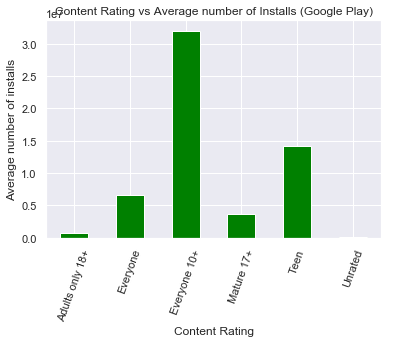

In [8]:
content_group = df.groupby(by="Content Rating") 
installavg = content_group["Installs"].mean()
ax = installavg.plot(kind="bar",
                   color="green",
                   rot=70)


plt.ylabel("Average number of installs")
plt.title("Content Rating vs Average number of Installs (Google Play)")
plt.show()

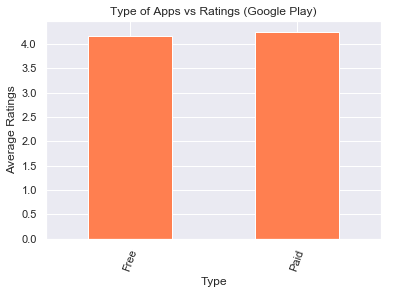

In [9]:
type_group = df.groupby(by="Type") 
ratingsavg = type_group["Rating"].mean()

ax = ratingsavg.plot(kind="bar",
                   color="coral",
                   rot=70)


plt.ylabel("Average Ratings")
plt.title("Type of Apps vs Ratings (Google Play)")
plt.show()

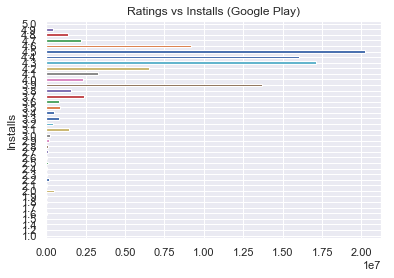

In [10]:
rating_group = df.groupby(by="Rating")
installsavg = rating_group["Installs"].mean()
installsavg.plot(kind="barh") 
plt.ylabel("Installs")
plt.title("Ratings vs Installs (Google Play)")
plt.show()

# Hypothesis: We predict that the average size of apps will be significantly different in Google Play Store and Apple Store.



# 2 Sample t Test

In [11]:
stats.ttest_ind(df["Size"], df2["size_bytes"], equal_var=False) 

Ttest_indResult(statistic=-41.251845718722294, pvalue=0.0)

P value is lower than 0.05, which means that we can reject the null hypothesis. So, the average sizes have a significant difference between two stores except the apps with size data of "Varies with device".

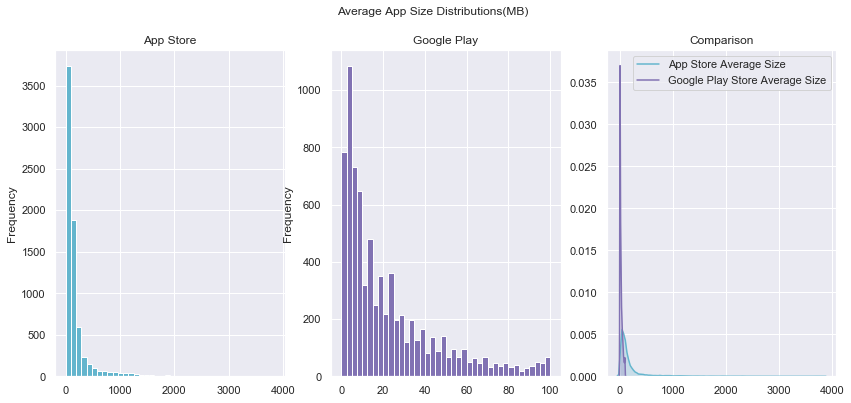

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
df2["size_bytes"].plot(kind="hist", ax=ax[0], bins=40, label="completed", color="c")
ax[0].set_title("App Store")

df["Size"].plot(kind="hist", ax=ax[1], bins=40, label="none", color="m")
ax[1].set_title("Google Play")

sns.kdeplot(df2["size_bytes"], shade=True, label="App Store Average Size", ax=ax[2], color="c")
sns.kdeplot(df["Size"], shade=True, label="Google Play Store Average Size", ax=ax[2], color="m")
ax[2].set_title("Comparison")

plt.suptitle("Average App Size Distributions(MB)")
plt.show()

# Hypothesis: We predict that there wouldn't be a significant difference in the ratings of the apps in Google Play Store and Apple Store.

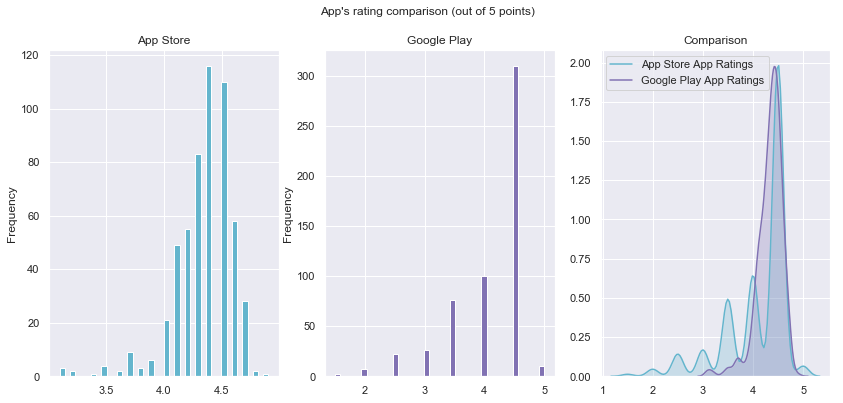

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
df_o3["Rating"].plot(kind="hist", ax=ax[0], bins=40, label="completed", color="c")
ax[0].set_title("App Store")

df_o3["user_rating"].plot(kind="hist", ax=ax[1], bins=40, label="none", color="m")
ax[1].set_title("Google Play")

sns.kdeplot(df_o3["user_rating"], shade=True, label="App Store App Ratings", ax=ax[2], color="c")
sns.kdeplot(df_o3["Rating"], shade=True, label="Google Play App Ratings", ax=ax[2], color="m")
ax[2].set_title("Comparison")

plt.suptitle("App's rating comparison (out of 5 points)")
plt.show()

#This plot shows the app ratings comparison among the SAME apps that are in app store and in the google play store.

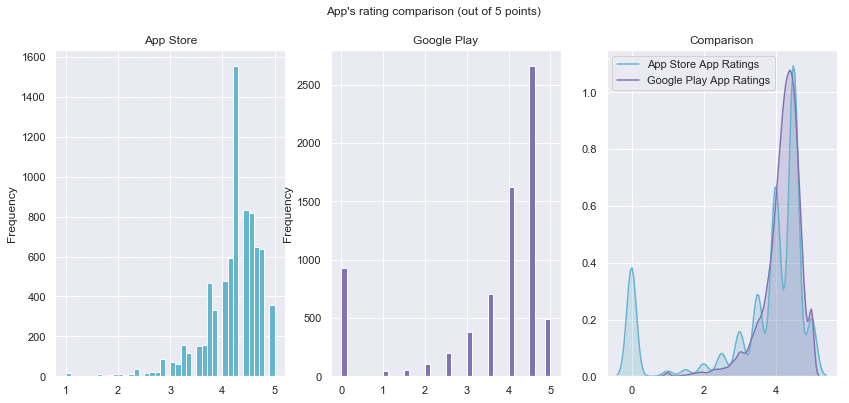

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
df["Rating"].plot(kind="hist", ax=ax[0], bins=40, label="completed", color="c")
ax[0].set_title("App Store")

df2["user_rating"].plot(kind="hist", ax=ax[1], bins=40, label="none", color="m")
ax[1].set_title("Google Play")

sns.kdeplot(df2["user_rating"], shade=True, label="App Store App Ratings", ax=ax[2], color="c")
sns.kdeplot(df["Rating"], shade=True, label="Google Play App Ratings", ax=ax[2], color="m")
ax[2].set_title("Comparison")

plt.suptitle("App's rating comparison (out of 5 points)")
plt.show()

#This plot shows the app ratings comparison among the ALL apps that are in app store and in the google play store.

In [15]:
stats.ttest_ind(df["Rating"], df2["user_rating"], equal_var=False)

Ttest_indResult(statistic=34.16696638166705, pvalue=1.5526020341512213e-240)

P value is lower than 0.05, which means that we can reject the null hypothesis. So, the app ratings have a significant difference between two stores.

In [16]:
stats.ttest_ind(df_o3["Rating"], df_o3["user_rating"], equal_var=False)

Ttest_indResult(statistic=8.68454705890702, pvalue=2.484805801038794e-17)

This one is among the same apps' ratings comparison of two app stores. P value is lower than 0.05, which means that we can reject the null hypothesis. So, the app ratings have a significant difference between two stores.

# Linear Regression

In [17]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [18]:
from sklearn.model_selection import train_test_split

X = df[["Rating", "Size"]]
y = df["Installs"]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [19]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
lr.coef_

array([3013149.41416567,  307548.89904191])

In [21]:
lr.intercept_

-11686040.803649796

### Linear Regression equation

z = ax + by + c 

z = (3013149.41416567)x + (307548.89904191)y + (-11686040.8036498)

In [22]:
lr.score(X_test, y_test)

0.034282655556363784

R^2 = 0.034282655556363784

R^2 being 3.4% means that the regression is rather random than being a straight line.

In [23]:
from sklearn.metrics import mean_squared_error

y_predict = lr.predict(X_test)

lr_mse = mean_squared_error(y_predict, y_test)

print(lr_mse) #Mean Squared Error

3017590888718671.5


Mean Squared Error = 3017590888718671.5

Mean Squarred Error being too high means that the mean of distance of items from our regression equation is too high. This shows us that the items are too far away from our regression line which makes it hard to guess the next item.

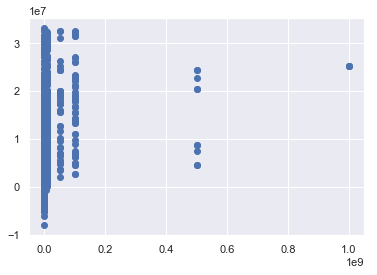

In [24]:
predictions = lr.predict(X_test)
plt.scatter(y_test, predictions)